In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, log_loss, classification_report


## Data read

In [2]:
training_data1 = pd.read_csv('lin_reg_training.csv', header=None, names=['x', 'y'])
training_data1.head()

,x,y
0,11,139.661485
1,12,93.611529
2,14,147.534908
3,15,160.793329
4,17,257.756935


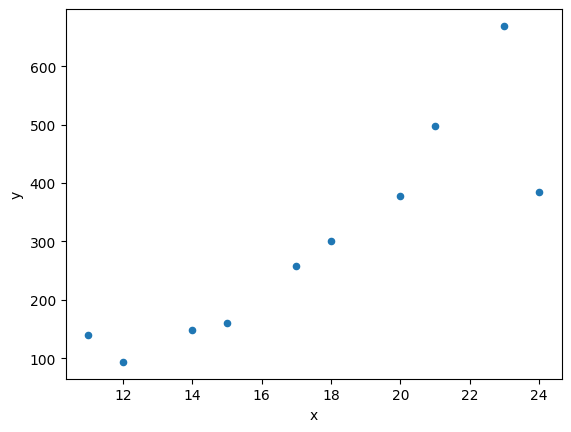

In [3]:
training_data1.plot(kind='scatter', x='x', y='y')
plt.show()

In [4]:
x1_train = training_data1[['x']].values
y1_train = training_data1[['y']].values
print(f'{x1_train.shape=}, {y1_train.shape=}')

x1_train.shape=(10, 1), y1_train.shape=(10, 1)


## Polynomial regression model creation

In [5]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=6)),
    ('regression', LinearRegression())
])

model.fit(x1_train, y1_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=6)),
                ('regression', LinearRegression())])

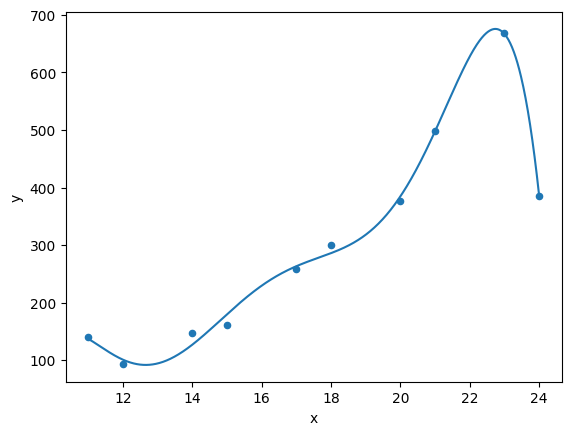

In [6]:
x_reg = np.linspace(x1_train.min(), x1_train.max(), 1000).reshape(-1,1)
y_reg = model.predict(x_reg)

training_data1.plot(kind='scatter', x='x', y='y')
plt.plot(x_reg.flatten(), y_reg.flatten())
plt.show()

In [7]:
y1_pred = model.predict(x1_train)
cost = mean_squared_error(y1_train, y1_pred)
print(cost)

114.61769420507514


In [8]:
test_data1 = pd.read_csv('lin_reg_test.csv', header=None, names=['x', 'y'])
test_data1.head()

,x,y
0,10,94.191540
1,13,145.615943
2,16,199.777830
3,19,370.808989
4,22,383.868422


In [9]:
x1_test = test_data1[['x']].values
y1_test = test_data1[['y']].values

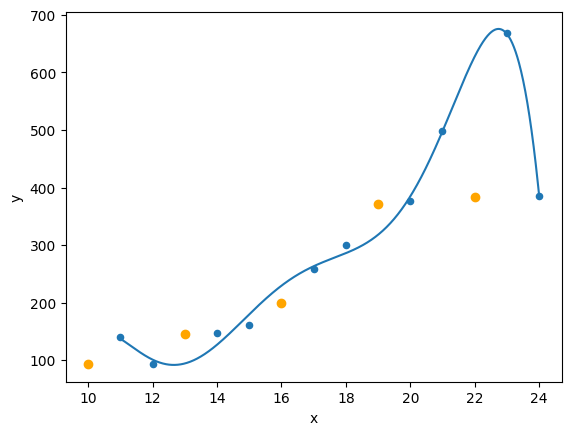

In [10]:
x_reg = np.linspace(x1_train.min(), x1_train.max(), 1000).reshape(-1,1)
y_reg = model.predict(x_reg)

training_data1.plot(kind='scatter', x='x', y='y')
plt.scatter(test_data1['x'], test_data1['y'], color='orange', label='Test Data')
plt.plot(x_reg.flatten(), y_reg.flatten())
plt.show()

In [11]:
y1_pred = model.predict(x1_test)
cost = mean_squared_error(y1_test, y1_pred)
print(cost)

13426.689013145962


## Regularization - Ridge Regression

In [12]:
def get_linear_regression_model(alpha, degree=6):
  return Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('regression', Ridge(alpha=alpha))
  ])

7428.887392045695
5210.6013454711
11197.451519188962
13231.367950449785
13409.66510691077


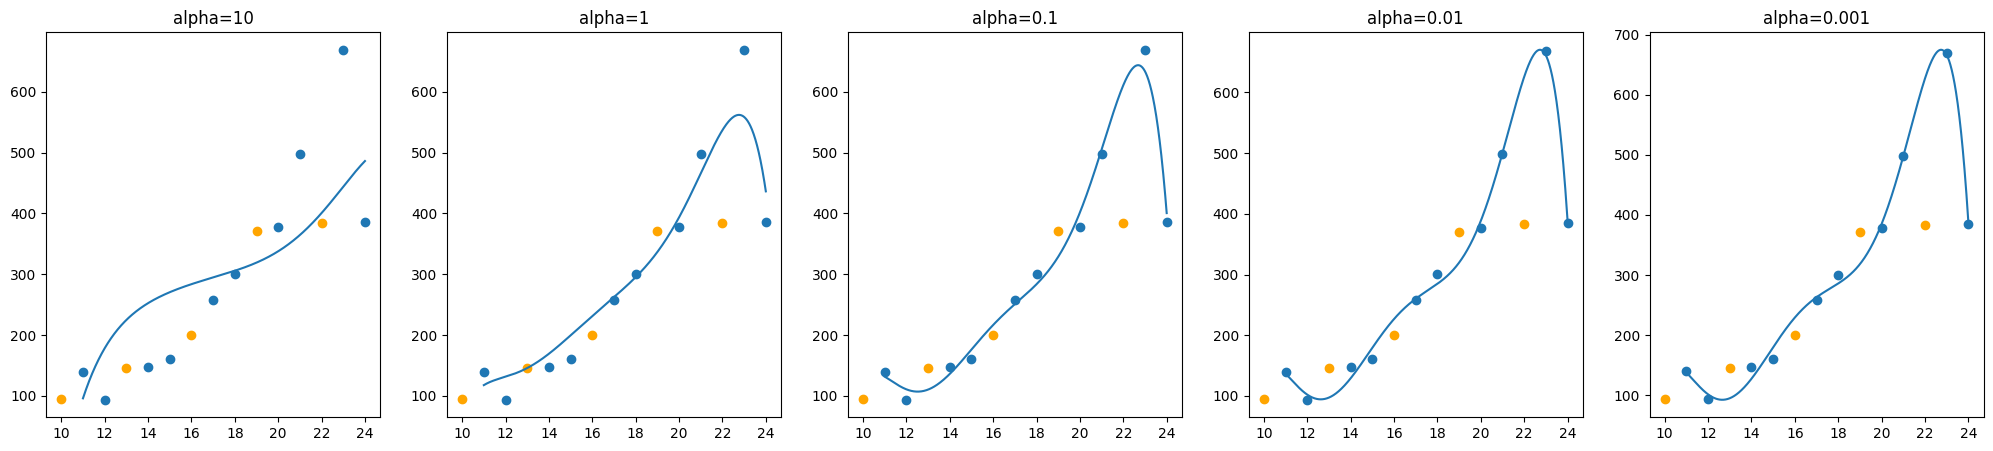

In [13]:
lambdas = [10, 1, 0.1, 0.01, 0.001] 
costs = {}
n = len(lambdas)
fig, ax = plt.subplots(1, n, figsize=(n*5, 5))
for i, alpha in enumerate(lambdas):
  model = get_linear_regression_model(alpha)
  model.fit(x1_train, y1_train)
  y1_pred = model.predict(x1_test)
  cost = mean_squared_error(y1_test, y1_pred)
  print(cost)
  costs[alpha] = cost
  x_reg = np.linspace(x1_train.min(), x1_train.max(), 1000).reshape(-1,1)
  y_reg = model.predict(x_reg)

  ax[i].scatter(training_data1['x'], training_data1['y'])
  ax[i].scatter(test_data1['x'], test_data1['y'], color='orange', label='Test Data')
  ax[i].set_title(f'alpha={alpha}')
  ax[i].plot(x_reg.flatten(), y_reg.flatten())
plt.show()

## Regularization - Logistic Regression

In [14]:
training_data2 = pd.read_csv('logi_reg_training.csv', header=None, names=['x1', 'x2', 'y'])
test_data2 = pd.read_csv('logi_reg_test.csv', header=None, names=['x1', 'x2', 'y'])

x1_train2 = training_data2['x1'].values.reshape(-1,1)
x2_train2 = training_data2['x2'].values.reshape(-1,1)
y2_train = training_data2['y'].values.reshape(-1,1)

x1_test2 = test_data2['x1'].values.reshape(-1,1)
x2_test2 = test_data2['x2'].values.reshape(-1,1)
y2_test = test_data2['y'].values.reshape(-1,1)

x_train2 = np.concatenate([x1_train2, x2_train2], axis=1)
x_test2 = np.concatenate([x1_test2, x2_test2], axis=1)

In [15]:
def get_logistic_regression_model(alpha, degree=6):
  return Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=degree)),
    ('regression', LogisticRegression(penalty='l2', C=alpha, solver='lbfgs'))
  ])

alpha=10, cost=0.0476


/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

alpha=1, cost=0.0000
alpha=0.1, cost=0.0952
alpha=0.01, cost=0.1905
alpha=0.001, cost=0.3810


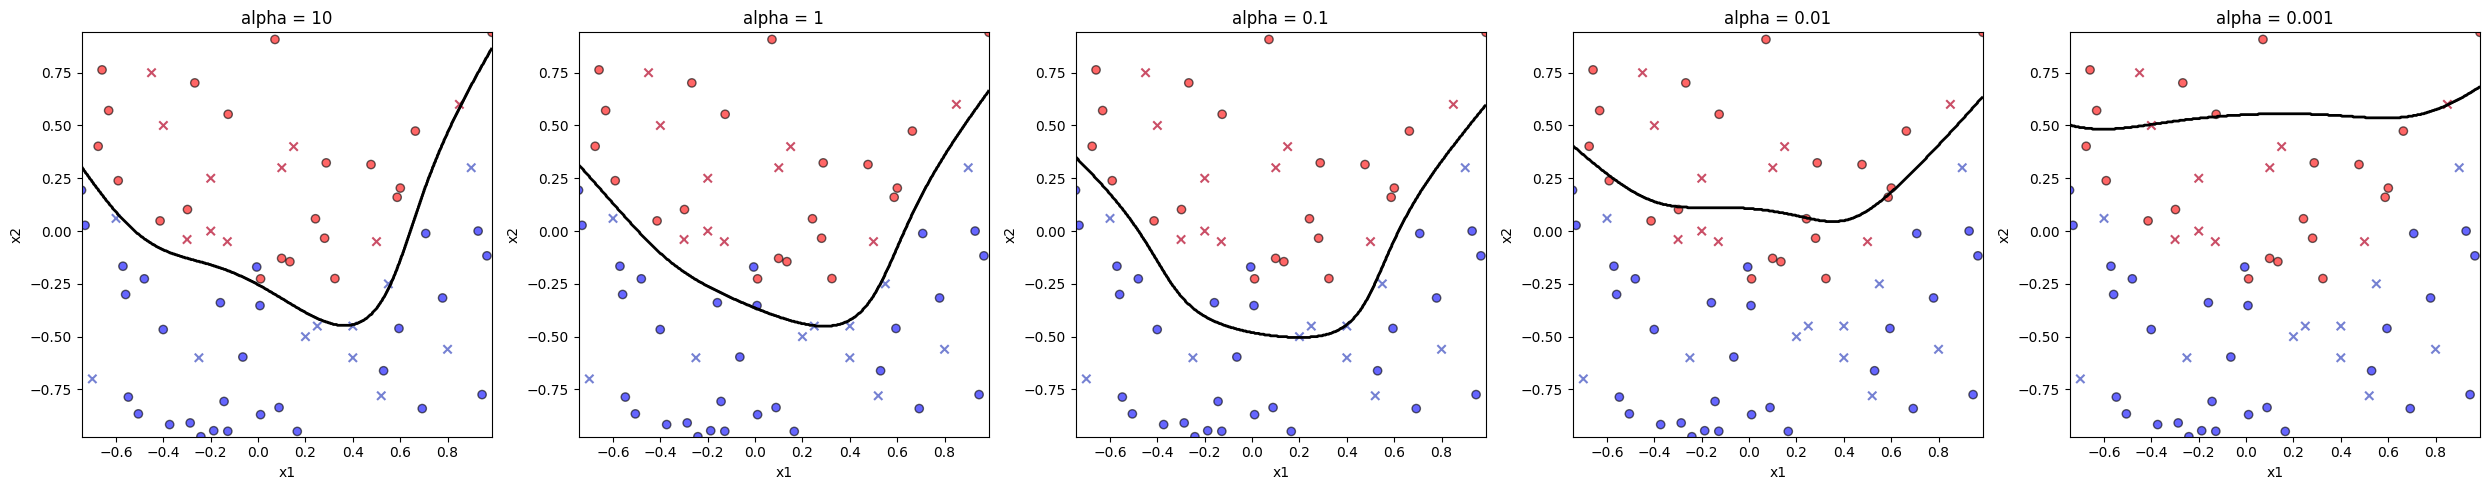

In [16]:
lambdas = [10, 1, 0.1, 0.01, 0.001] 
costs = {}
n = len(lambdas)
fig, ax = plt.subplots(1, n, figsize=(n*5, 5))

for i, alpha in enumerate(lambdas):
    model = get_logistic_regression_model(alpha)
    model.fit(x_train2, y2_train)
    y2_pred = model.predict(x_test2)
    cost = mean_squared_error(y2_test, y2_pred)
    print(f'alpha={alpha}, cost={cost:.4f}')
    costs[alpha] = cost

    ax[i].scatter(x_train2[:, 0], x_train2[:, 1], c=y2_train, cmap='bwr', alpha=0.6, edgecolors='k')
    ax[i].scatter(x_test2[:, 0], x_test2[:, 1], c=y2_test, cmap='coolwarm', marker='x', label='Test', alpha=0.7)

    x1_min, x1_max = x_train2[:, 0].min(), x_train2[:, 0].max()
    x2_min, x2_max = x_train2[:, 1].min(), x_train2[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 500),
                         np.linspace(x2_min, x2_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid)
    zz = zz.reshape(xx.shape)

    # Granica decyzyjna
    ax[i].contour(xx, yy, zz, levels=[0.5], linewidths=2, colors='black')
    ax[i].set_title(f'alpha = {alpha}')
    ax[i].set_xlabel('x1')
    ax[i].set_ylabel('x2')

plt.tight_layout()
plt.show()

## IRIS dataset

In [17]:
from sklearn.datasets import load_iris
 
data = load_iris()
x = data.data
y = data.target

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)

### No regularization, linear logistic regression

In [19]:
# no penalty
model = Pipeline([
    ('scaler', StandardScaler()),
    # ('poly_features', PolynomialFeatures(degree=6)),
    ('regression', LogisticRegression(penalty=None))])

In [20]:
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LogisticRegression(penalty=None))])

In [21]:
y_train_probabs = model.predict_proba(x_train)
y_test_probabs = model.predict_proba(x_test)

cost_train = log_loss(y_train, y_train_probabs)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = model.predict(x_test)

print(f'{cost_train=}, {cost_test=}')
print(classification_report(y_test, y_test_pred))

cost_train=0.04550645668061373, cost_test=0.04103018425074305
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### No regularization, polynomial logistic regression

In [22]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=6)),
    ('regression', LogisticRegression(penalty=None))])
model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=6)),
                ('regression', LogisticRegression(penalty=None))])

In [23]:
y_train_probabs = model.predict_proba(x_train)
y_test_probabs = model.predict_proba(x_test)

cost_train = log_loss(y_train, y_train_probabs)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = model.predict(x_test)

print(f'{cost_train=}, {cost_test=}')
print(classification_report(y_test, y_test_pred))

cost_train=0.0003284305027380899, cost_test=1.081630858922895
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



### Regularization

In [24]:
lambdaa = 1

model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=6)),
    ('regression', LogisticRegression(penalty='l2', C=1/lambdaa))])
model.fit(x_train, y_train)

/opt/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=6)),
                ('regression', LogisticRegression())])

In [25]:
y_train_probabs = model.predict_proba(x_train)
y_test_probabs = model.predict_proba(x_test)

cost_train = log_loss(y_train, y_train_probabs)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = model.predict(x_test)
print(f'{cost_train=}, {cost_test=}')
print(classification_report(y_test, y_test_pred))

cost_train=0.04648910804665985, cost_test=0.06201947306516515
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

